In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn, sys
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.linalg import lstsq

## Version Numbers

In [2]:
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ('Scipy', scipy), ('Sklearn', sklearn))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.5.4 |Anaconda custom (x86_64)| (default, Aug 14 2017, 12:43:10) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.13.1
Pandas Version: 0.20.3
Scipy Version: 0.19.1
Sklearn Version: 0.19.0


---

## Get Data

In [3]:
np.random.seed(10)
X = np.random.randint(1,20,10)
X_wbias = np.c_[np.ones(X.shape[0]), X]
y = np.dot(X, 0.5) + np.random.normal(loc=4, scale=4)

In [4]:
X

array([10,  5, 16,  1, 18, 17, 18,  9, 10,  1])

In [5]:
X_wbias

array([[  1.,  10.],
       [  1.,   5.],
       [  1.,  16.],
       [  1.,   1.],
       [  1.,  18.],
       [  1.,  17.],
       [  1.,  18.],
       [  1.,   9.],
       [  1.,  10.],
       [  1.,   1.]])

In [6]:
y

array([  6.2715046,   3.7715046,   9.2715046,   1.7715046,  10.2715046,
         9.7715046,  10.2715046,   5.7715046,   6.2715046,   1.7715046])

In [7]:
print('dimensionality of features:', X.shape)
print('dimensionality of target:', y.shape)

dimensionality of features: (10,)
dimensionality of target: (10,)


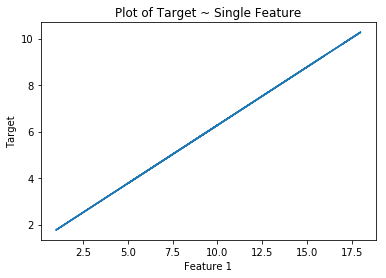

In [8]:
plt.plot(X, y);
plt.title('Plot of Target ~ Single Feature')
plt.xlabel('Feature 1')
plt.ylabel('Target');

---

## 1. Sklearn

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lr.intercept_

1.2715046026655648

In [11]:
lr.coef_

array([ 0.5])

In [12]:
sklearn_coef = [lr.intercept_, lr.coef_]
sklearn_coef

[1.2715046026655648, array([ 0.5])]

---

## 2. Scipy Least Squares Solution

In [13]:
sp_coef, residue, rank, s = lstsq(X_wbias, y)
sp_coef

array([ 1.2715046,  0.5      ])

---

## 3. Coefficients w/Linear Algebra
The closed form solution for finding linear regression coefficients: $\hat{\theta}$ = ($X^TX)^{-1}X^TY$

In [14]:
xtx = np.dot(X_wbias.T, X_wbias)
inv_xtx = np.linalg.inv(xtx)
xty = np.dot(X_wbias.T, y)

In [15]:
la_coef = np.dot(inv_xtx, xty)
la_coef

array([ 1.2715046,  0.5      ])

---

## 4. Coefficients w/Gradient Descent

In [16]:
class batch_gradient_descent:
        
    def __init__(self, X, y, alpha=0.01, max_iter=5, seed=None):
        self._data = np.c_[np.ones(X.shape[0]), X]
        self._target = y
        self.alpha_ = alpha
        self._nbobservations = self._data.shape[0]
        self._nbfeatures = self._data.shape[1]
        self.max_iter_ = max_iter
        self._seed = seed
        if self._seed is not None:
            np.random.seed(self._seed)
        self.coef_ = np.random.randn(self._data.shape[1])
        self._iteration = 0
    
    def _calc_loss(self):
        '''return difference between prediction and target'''
        return self.predict(self._data) - self._target 
    
    def _update_weights(self):
        '''update model weights'''
        loss = self._calc_loss()
        cost = np.sum(np.power(loss, 2)) / (2 * self._nbobservations)
        gradient = np.dot(self._data.T, loss) / self._nbobservations
        self.coef_ = self.coef_ - self.alpha_ * gradient
        
    def fit(self):
        '''run gradient descent on training data'''
        for _ in range(self.max_iter_):
            if _ % 10 == 0:
                print('Epoch: {0} \nMSE: {1}, \nCoefs: {2}\n'.format(self._iteration, self.mse(), self.coef_))
            self._iteration += 1
            self._update_weights()
            
    def predict(self, X_train):
        '''returns predictions given inputs'''
        return np.dot(X_train, self.coef_)
            
    def mse(self):
        '''returns mean squared error'''
        return np.mean( (self._calc_loss()) ** 2)  

In [17]:
def plot(X, y, obj):
    '''plot actual vs predicted values'''
    plt.plot(X, y, color='darkblue');
    plt.plot(X, obj.predict(np.c_[np.ones(X.size), X]), color='darkorange');
    plt.legend(['actual', 'predicted'])

In [18]:
gd = batch_gradient_descent(X=X, y=y, alpha=0.01, max_iter=1000, seed=35)

In [19]:
gd.coef_

array([-1.88973671, -0.41359218])

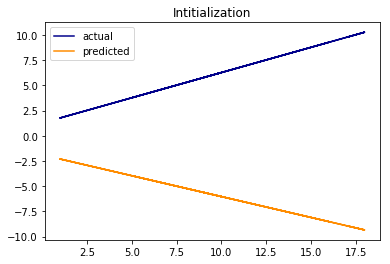

In [20]:
plot(X, y, gd)
plt.title('Intitialization');

In [21]:
gd.fit()

Epoch: 0 
MSE: 195.9243051220614, 
Coefs: [-1.88973671 -0.41359218]

Epoch: 10 
MSE: 2.3922638230103646, 
Coefs: [-1.73020537  0.70904156]

Epoch: 20 
MSE: 2.2687383245785164, 
Coefs: [-1.65174928  0.7048505 ]

Epoch: 30 
MSE: 2.1518222423121136, 
Coefs: [-1.57543014  0.69950381]

Epoch: 40 
MSE: 2.040931258154729, 
Coefs: [-1.5011036   0.69429526]

Epoch: 50 
MSE: 1.9357548772417943, 
Coefs: [-1.42871755  0.68922268]

Epoch: 60 
MSE: 1.8359986059272326, 
Coefs: [-1.35822133  0.68428254]

Epoch: 70 
MSE: 1.7413831268604796, 
Coefs: [-1.28956559  0.67947137]

Epoch: 80 
MSE: 1.6516435168984913, 
Coefs: [-1.22270228  0.67478581]

Epoch: 90 
MSE: 1.5665285053214941, 
Coefs: [-1.15758462  0.67022258]

Epoch: 100 
MSE: 1.4857997702754986, 
Coefs: [-1.09416701  0.66577848]

Epoch: 110 
MSE: 1.4092312714716062, 
Coefs: [-1.03240509  0.66145041]

Epoch: 120 
MSE: 1.3366086172736762, 
Coefs: [-0.97225562  0.65723533]

Epoch: 130 
MSE: 1.2677284644021918, 
Coefs: [-0.9136765  0.6531303]

Epoch: 

In [22]:
gd.coef_

array([ 1.05275676,  0.51532913])

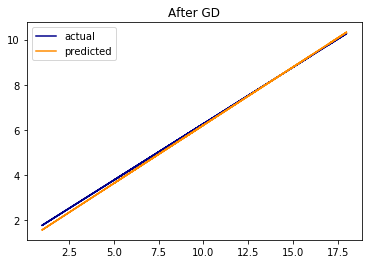

In [23]:
plot(X, y, gd)
plt.title('After GD');

---

## Side-by-Side

In [24]:
# Compare Scratch & Sklearn coefficients
import pandas as pd
pd.DataFrame(data=np.matrix([la_coef, sp_coef, sklearn_coef, gd.coef_]).reshape(4, 2).T, 
             index = ['theta0', 'theta1'],
             columns=['analytic', 'scipy', 'sklearn', 'grad desc'])

,analytic,scipy,sklearn,grad desc
theta0,1.271505,1.271505,1.271505,1.052757
theta1,0.500000,0.500000,0.500000,0.515329
